# 1장 신경망 복습

## 수학과 파이썬

### 벡터와 행렬

In [16]:
import numpy as np

In [4]:
x = np.array([1,2,3])
x.__class__

numpy.ndarray

In [8]:
display(x.shape)
display(x.ndim)

(3,)

1

In [11]:
W = np.array([[1,2,3],[4,5,6]])
print(W.shape,',',W.ndim)

(2, 3) , 2


### 행렬의 원소별 연산

In [23]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])

display(W + X)
display(W * X)

array([[ 1,  3,  5],
       [ 7,  9, 11]])

array([[ 0,  2,  6],
       [12, 20, 30]])

### 브로드캐스트

In [24]:
A = np.array([[1,2],[3,4]])
A * 10

array([[10, 20],
       [30, 40]])

In [25]:
A = np.array([[1,2],[3,4]])
b = np.array([10,20])
A * b

array([[10, 40],
       [30, 80]])

### 내적과 행렬의 곱

In [26]:
# 벡터 내적
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [27]:
# 행렬의 곱
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

### 행렬의 형상 확인

- 행렬의 shape를 확인하여 계산이 원활하도록 한다

## 신경망 추론

### 신경망 추론 전체 그림

In [29]:
# 완전연결층에 의한 변환의 미니배치 버전을 파이썬으로 구현
W1 = np.random.randn(2,4) # 가중치
b1 = np.random.randn(4) # bias
x = np.random.randn(10,2) # 입력
h = np.matmul(x,W1) + b1

In [31]:
# 비선형성을 부여하기 위해 시그모이드 함수를 이용
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [32]:
a = sigmoid(h)

In [33]:
# 은닉층 4개의 뉴런, 출력 3개 모델 만들기
# 10개씩 배치학습

x = np.random.randn(10,2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)

h = np.matmul(x,W1) + b1
a = sigmoid(h)
s = np.matmul(a,W2) + b2

### 계층으로 클래스화 및 순전파 구현


In [63]:
class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self,x):
        return 1/(1+np.exp(-x))

class Affine:
    def __init__(self,W,b):
        self.params = [W,b]
        
    def forward(self, x):
        W,b = self.params
        out = np.matmul(x,W) + b
        return out

In [64]:
# X -> Affine -> Sigmod -> Affine -> S

class TwoLayerNet:
    def __init__(self,input_size,hidden_size,out_size):
        I,H,O = input_size,hidden_size,out_size
        
        W1 = np.random.randn(I,H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H,O)
        b2 = np.random.randn(O)
        
        self.layers = [
            Affine(W1,b1)
            ,Sigmoid()
            ,Affine(W2,b2)
        ]
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [50]:
x = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)

## 신경망의 학습

### 손실함수
 - 교차엔트로피 사용

### 기울기와 미분

In [55]:
# Repeat 노드 : N배로 복제

D, N = 8, 7
x = np.random.randn(1,D)
y = np.repeat(x,N,axis=0)
dy = np.random.randn(N,D)
dx = np.sum(dy, axis=0, keepdims=True)

In [58]:
# sum 노드
D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis=0, keepdims=True)

dy = np.random.randn(1,D)
dx = np.repeat(dy, N, axis=0)

In [60]:
# matmul 노드
class MatMul:
    def __init__(self,W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.matmul(x,W)
        self.x = x
        return out
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout,W.T)
        dW = np.matmul(self.x.T,dout)
        self.grads[0][...] = dW # 깊은 복사를 이용함
        return dx

In [61]:
a = np.array([1,2,3])
b = np.array([4,5,6])

### 기울기 도출과 역전파 구현

In [65]:
# sigmoid 계층
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [],[]
        self.out = None
    
    def forward(self,x):
        out = 1/(1+np.exp(-x))
        self.out = out
        return out
    def backward(self, dout):
        dx = dout * (1 - self.out) * (self.out)
        return dx

In [66]:
# Affine 계층
class Affine:
    def __init__(self,W,b):
        self.params = [W,b]
        self.grads = [np.zeros_like(W),np.zeros_like(b)]
        self.x = None
    def forward(self, x):
        W,b = self.params
        out = np.matmul(x,W) + b
        self.x = x
        return out
    def backward(self, dout):
        W,b = self.params
        dx = np.matmul(dout,W.T)
        dW = np.matmul(self.x.T,dout)
        db = np.sum(dout,axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

In [ ]:
# Softmax with Loss 계층
# 3 레이블 분류모델, 교차엔트로피 사용

### 가중치 갱신

1. 미니배치 : 훈련데이터 중 무작위로 다수의 데이터 선택  

2. 기울기 계산 : 오차역전파법으로 각 가중치 매개변수에 대한 손실함수의 기울기를 구한다.  

3. 매개변수 갱신 : 기울기를 이용하여 가중치 매개변수를 갱신한다.  

4. 반복 : 1~3단계를 필요한 만큼 반복한다.

In [67]:
# SGD
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

## 신경망으로 문제를 풀다

### 스파이럴 데이터셋

In [71]:
from dataset import spiral
import matplotlib.pyplot as plt
%matplotlib notebook

In [73]:
x,t = spiral.load_data()
print(x.shape,t.shape)

(300, 2) (300, 3)


<IPython.core.display.Javascript object>


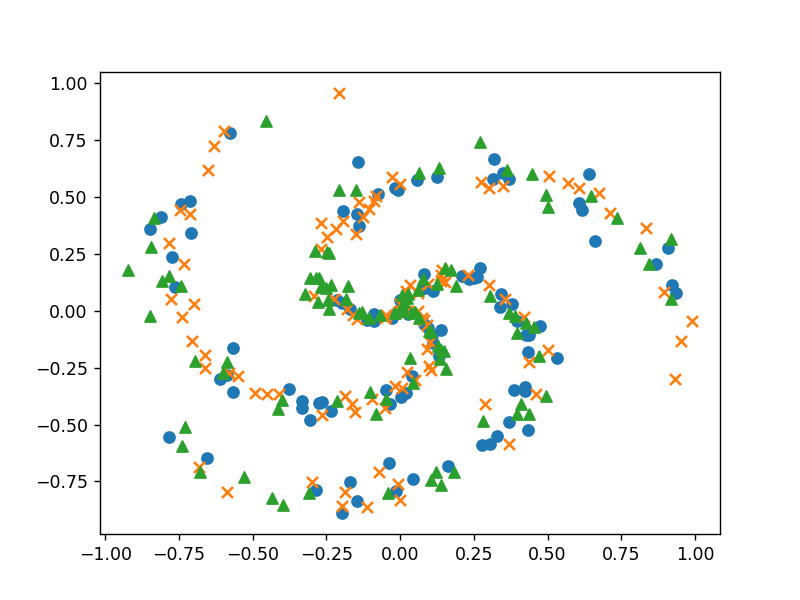

In [109]:
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

### 신경망 구현
- 2 layer

In [98]:
import  sys
sys.path.append('deep2')
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

In [101]:
class TwoLayerNet:
    def __init__(self, input_size,hidden_size,out_size):
        I, H, O = input_size,hidden_size,out_size
        
        W1 = 0.01 * np.random.randn(I,H)
        b1 = np.zeros(H)
        W2 = 0.02 * np.random.randn(H,O)
        b2 = np.zeros(O)
        
        self.layers = [Affine(W1,b1),Softmax(),Affine(W2,b2)]
        self.loss_layer = SoftmaxWithLoss()
        
        self.params,self.grads = [],[]
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self,x,t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

### 학습용 코드

In [102]:
from deep2.common.optimizer import SGD

In [121]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x,t = spiral.load_data()
model = TwoLayerNet(2,10,3)
optimizer = SGD(lr = learning_rate)

data_size = len(x)
max_iters = data_size//batch_size
total_loss = 0
loss_count = 0
loss_list = []

In [122]:
for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        loss = model.forward(batch_x,batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        if (iters+1)%10 == 0:
            avg_loss = total_loss/loss_count
            print('|에폭 %d|반복 %d/%d|손실 %0.2f' % (epoch+1, iters+1,max_iters,avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

|에폭 1|반복 10/10|손실 1.10
|에폭 2|반복 10/10|손실 1.11
|에폭 3|반복 10/10|손실 1.10
|에폭 4|반복 10/10|손실 1.10
|에폭 5|반복 10/10|손실 1.10
|에폭 6|반복 10/10|손실 1.11
|에폭 7|반복 10/10|손실 1.11
|에폭 8|반복 10/10|손실 1.10
|에폭 9|반복 10/10|손실 1.11
|에폭 10|반복 10/10|손실 1.11
|에폭 11|반복 10/10|손실 1.11
|에폭 12|반복 10/10|손실 1.11
|에폭 13|반복 10/10|손실 1.11
|에폭 14|반복 10/10|손실 1.10
|에폭 15|반복 10/10|손실 1.11
|에폭 16|반복 10/10|손실 1.11
|에폭 17|반복 10/10|손실 1.10
|에폭 18|반복 10/10|손실 1.10
|에폭 19|반복 10/10|손실 1.11
|에폭 20|반복 10/10|손실 1.11
|에폭 21|반복 10/10|손실 1.11
|에폭 22|반복 10/10|손실 1.10
|에폭 23|반복 10/10|손실 1.10
|에폭 24|반복 10/10|손실 1.10
|에폭 25|반복 10/10|손실 1.10
|에폭 26|반복 10/10|손실 1.09
|에폭 27|반복 10/10|손실 1.08
|에폭 28|반복 10/10|손실 1.08
|에폭 29|반복 10/10|손실 1.08
|에폭 30|반복 10/10|손실 1.06
|에폭 31|반복 10/10|손실 1.06
|에폭 32|반복 10/10|손실 1.03
|에폭 33|반복 10/10|손실 1.00
|에폭 34|반복 10/10|손실 0.96
|에폭 35|반복 10/10|손실 0.94
|에폭 36|반복 10/10|손실 0.92
|에폭 37|반복 10/10|손실 0.91
|에폭 38|반복 10/10|손실 0.90
|에폭 39|반복 10/10|손실 0.89
|에폭 40|반복 10/10|손실 0.90
|에폭 41|반복 10/10|손실 0.90
|에폭 42|반복 10/10|손실 0.89
|

<IPython.core.display.Javascript object>


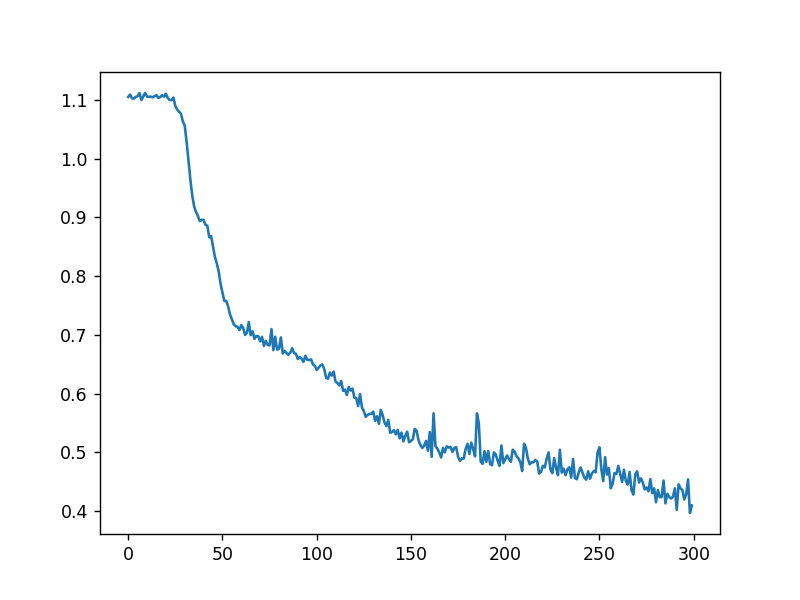

In [123]:
plt.figure()
plt.plot(loss_list)

<IPython.core.display.Javascript object>


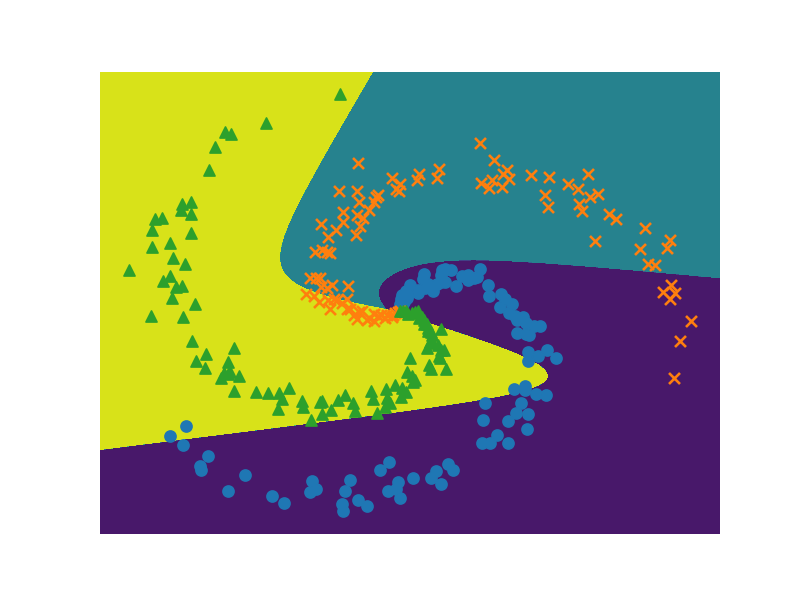

In [129]:
h = 0.001
plt.figure()
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

### Trainer 클래스

In [125]:
from deep2.common.trainer import Trainer

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 25 |  반복 1 / 10 | 시간

| 에폭 243 |  반복 1 / 10 | 시간 0[s] | 손실 0.49
| 에폭 244 |  반복 1 / 10 | 시간 0[s] | 손실 0.45
| 에폭 245 |  반복 1 / 10 | 시간 0[s] | 손실 0.44
| 에폭 246 |  반복 1 / 10 | 시간 0[s] | 손실 0.46
| 에폭 247 |  반복 1 / 10 | 시간 0[s] | 손실 0.47
| 에폭 248 |  반복 1 / 10 | 시간 0[s] | 손실 0.47
| 에폭 249 |  반복 1 / 10 | 시간 0[s] | 손실 0.45
| 에폭 250 |  반복 1 / 10 | 시간 0[s] | 손실 0.46
| 에폭 251 |  반복 1 / 10 | 시간 0[s] | 손실 0.51
| 에폭 252 |  반복 1 / 10 | 시간 0[s] | 손실 0.51
| 에폭 253 |  반복 1 / 10 | 시간 0[s] | 손실 0.46
| 에폭 254 |  반복 1 / 10 | 시간 0[s] | 손실 0.46
| 에폭 255 |  반복 1 / 10 | 시간 0[s] | 손실 0.51
| 에폭 256 |  반복 1 / 10 | 시간 0[s] | 손실 0.44
| 에폭 257 |  반복 1 / 10 | 시간 0[s] | 손실 0.48
| 에폭 258 |  반복 1 / 10 | 시간 0[s] | 손실 0.44
| 에폭 259 |  반복 1 / 10 | 시간 0[s] | 손실 0.45
| 에폭 260 |  반복 1 / 10 | 시간 0[s] | 손실 0.48
| 에폭 261 |  반복 1 / 10 | 시간 0[s] | 손실 0.45
| 에폭 262 |  반복 1 / 10 | 시간 0[s] | 손실 0.47
| 에폭 263 |  반복 1 / 10 | 시간 0[s] | 손실 0.48
| 에폭 264 |  반복 1 / 10 | 시간 0[s] | 손실 0.43
| 에폭 265 |  반복 1 / 10 | 시간 0[s] | 손실 0.48
| 에폭 266 |  반복 1 / 10 | 시간 0[s] | 

<IPython.core.display.Javascript object>


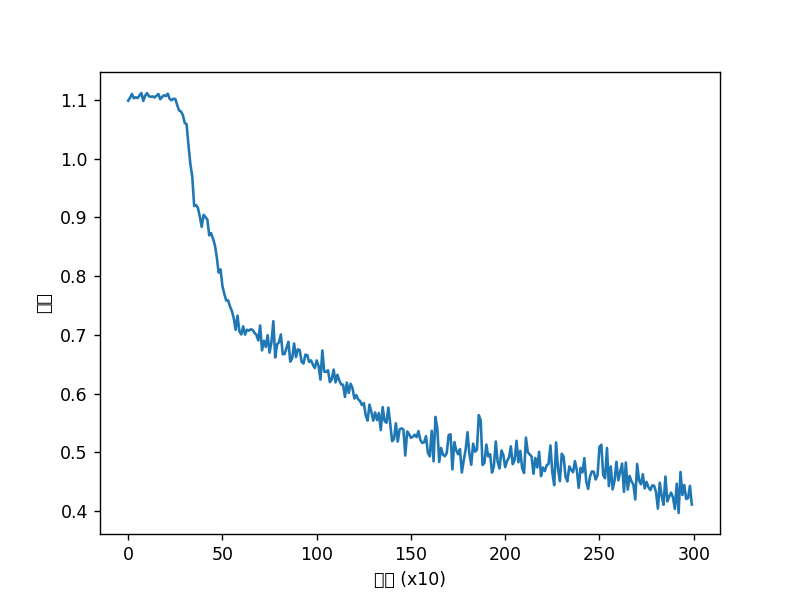

In [130]:
max_epoch = 300
batch_size = 30
hidden_sie = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(2,hidden_size,3)
optimizer = SGD(lr = learning_rate)

trainer = Trainer(model,optimizer)
trainer.fit(x,t,max_epoch,batch_size,eval_interval=10)
plt.figure()
trainer.plot()

## 계산 고속화